In [3]:
# This code is based from the following:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html
# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause
#
# https://github.com/Fedzbar/deepfedz/blob/master/mnist.ipynb
# Author: Federico Barbero <fb548@cam.ac.uk>
# License: MIT License
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

from bbnet.nn import NeuralNet
from bbnet.layers import Linear, Tanh
from bbnet.train import train
from bbnet.data import MiniBatchStochastic
from bbnet.optimizers import GD

# Specify number of examples for testing
test_samples = 2500

In [4]:
# Load data from https://www.openml.org/d/554
print("Fetching mnist_784 data...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

Fetching mnist_784 data...


In [5]:
# Randomize and reshape data before taking training and test examples
print("Randomizing and reshaping data...")
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X.iloc[permutation].values
y = y.iloc[permutation].values
# Reshape from 28x28 matrix to list of 784 values per example
X = X.reshape((X.shape[0], -1))

Randomizing and reshaping data...


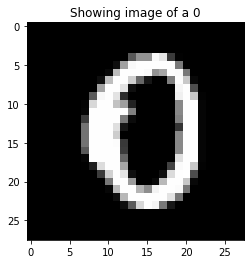

Raw estimates:
[[ 0.92615858 -0.0070164   0.08681002  0.0467679   0.01598733  0.03858213
  -0.10934597 -0.11087188  0.19554122 -0.11562264]]
The network says it's a 0, the actual label is 0


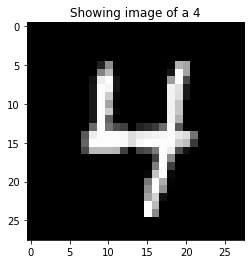

Raw estimates:
[[-0.03901922 -0.01385633  0.12319663  0.02819543  0.94365168 -0.01363744
  -0.08094234 -0.11722576  0.07347084  0.04424447]]
The network says it's a 4, the actual label is 4


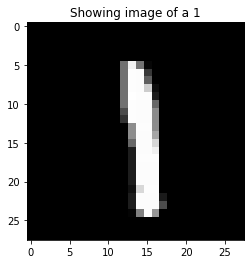

Raw estimates:
[[-0.03059048  0.95607151  0.09765277  0.04084628 -0.02276753 -0.02320101
  -0.09062297 -0.0976598   0.15211894 -0.00169246]]
The network says it's a 1, the actual label is 1


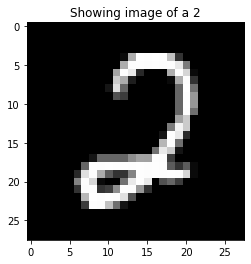

Raw estimates:
[[ 0.14050894 -0.01196008  0.94119994  0.02478089  0.01551194 -0.09946949
  -0.09336521 -0.10207959  0.05920837 -0.01750781]]
The network says it's a 2, the actual label is 2


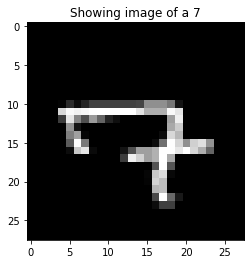

Raw estimates:
[[ 0.9988673   0.99996433  0.77400586 -0.94652731 -0.34424662  0.99705104
  -0.99911678  1.         -0.98414634 -0.98660949]]
The network says it's a 7, the actual label is 7


In [6]:
# Perform predictions on mnist data
for test_element_number in range(5):
    input_example = X[test_element_number]
    label_example = y[test_element_number]

    plt.title(f"Showing image of a {label_example}")
    plt.imshow(input_example.reshape(28,28), cmap='gray')
    plt.show()
    
    model = pickle.load(open('models/mnist_net.p', 'rb'))
    print('Raw estimates:')
    pred = model.forward(input_example)
    print(pred)

    clean_pred = pred.argmax()
    print(f"The network says it's a {clean_pred}, the actual label is {label_example}")